Get the complete data_set, together with the train and test data_set

In [1]:
from tf_chpvk_pv.dataset import *
import pandas as pd

df = create_dataset()

train_df, test_df = train_test_split()

2025-02-04 17:20:45.449 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


2025-02-04 17:20:46.715 | INFO     | tf_chpvk_pv.dataset:create_dataset:37 - Processing dataset...
2025-02-04 17:20:47.533 | SUCCESS  | tf_chpvk_pv.dataset:create_dataset:122 - Processing dataset complete.
2025-02-04 17:20:47.534 | INFO     | tf_chpvk_pv.dataset:train_test_split:132 - Creating train and test dataset...
2025-02-04 17:20:47.543 | SUCCESS  | tf_chpvk_pv.dataset:train_test_split:170 - Creating train and test dataset complete.


Train the SISSO model to obtain the features

In [2]:
from tf_chpvk_pv.features import run_SISSO_model

Inputs = run_SISSO_model()

2025-02-04 17:20:47.554 | SUCCESS  | tf_chpvk_pv.features:run_SISSO_model:66 - SISSO Features were already generated.


Train tree models with the SISSO features, to decide the best t_sisso

2025-02-04 17:20:48.498 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:81 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_AX_ratio - log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) - ((chi_AX_ratio + nB) / (log_rA_rB_ratio * nB)))
Classification tree accuracy (for t_sisso) on the train set: 0.907080.
Classification tree accuracy (for t_sisso) on the train set (5 fold CV): 0.906860.
Classification tree accuracy (for t_sisso) on the test set: 0.947368.
t_sisso < -3.492014 indicates stable perovskites.
Classification tree accuracy (for t) on the train set: 0.637168.
Classification tree accuracy (for t) on the train set (5 fold CV): 0.588116.
Classification tree accuracy (for t) on the test set: 0.614035.
0.832690 < t < 0.868914 indicates stable perovskites.
Classification tree accuracy (for tau) on the train set: 0.845133.
Classification tree accuracy (for tau) on the train set (5 fold CV): 0.840580.
Classification tree accuracy 

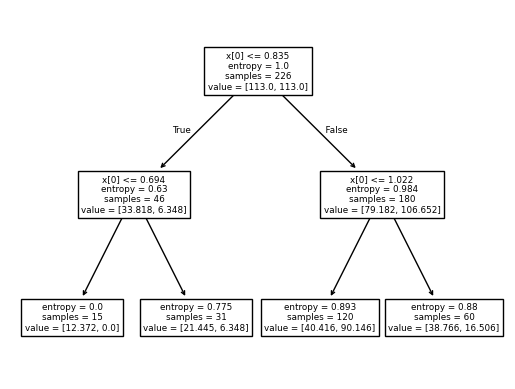

In [3]:
from tf_chpvk_pv.modeling.train import *

t_sisso_expression = train_tree_sis_features()
train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression)

tfs = ['t_sisso', 't', 'tau', 't_jess']
tf_tresh = [1, 2, 1, 2]

df_acc =pd.DataFrame()
clfs = {}

for tf, tresh in zip(tfs, tf_tresh):
    df_acc, clf_t = test_tolerance_factor(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=tresh)
    clfs[tf] = clf_t

In [4]:
train_df, test_df = train_platt_scaling(train_df, test_df, tolerance_factor_dict, clfs['t_sisso'])

2025-02-04 17:21:10.796 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:50 - Training Platt scaling model...
2025-02-04 17:21:10.864 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:70 - Platt scaling model training complete.


Now let's create new possible compositions

In [5]:
from tf_chpvk_pv.dataset import generate_compositions
from tf_chpvk_pv.modeling.predict import check_stable_compositions

elements_selection = ["Si", "Ge", "V", "Rh", "Ti", "Ru", "Mo", "Ta", "Nb",
                        "Sn", "Hf", "Zr", "Tb", "Pb", "Pt", "Ce", "U", "Ba",
                        "Eu", "Sr", "Ca", "Cd", "Cu", "Mg", "Zn", "Ge", "Fe",
                        "Nb", "La", "Pr", "Nd", "Yb", "Gd", "Sm", "Y", "Dy", "Ho",
                        "Er", "Tm", "Lu", "Sc", "Tl", "Bi",  "Pd", "Ni", "Co", "Ga",
                        "Al", "Cr", "In", "V", "Mn", "Tm"]

df_generated_comp = generate_compositions(elements_selection)
stable_candidates_t_sisso, df_out = check_stable_compositions('t_sisso')

2025-02-04 17:21:10.887 | INFO     | tf_chpvk_pv.dataset:generate_compositions:204 - Generating valid compositions...
2025-02-04 17:21:16.820 | SUCCESS  | tf_chpvk_pv.dataset:generate_compositions:336 - 950 valid compositions generated.
According to t_sisso, 848 compositions are predicted to be stable as perovskites:
['SnGeS3', 'SnGeSe3', 'PbGeS3', 'PbGeSe3', 'PtGeS3', 'PtGeSe3', 'BaGeS3', 'BaGeSe3', 'EuGeS3', 'EuGeSe3', 'SrGeS3', 'SrGeSe3', 'CaGeS3', 'CaGeSe3', 'CdGeS3', 'CdGeSe3', 'CuGeS3', 'CuGeSe3', 'MgGeS3', 'MgGeSe3', 'ZnGeS3', 'ZnGeSe3', 'RhVS3', 'RhVSe3', 'SnVS3', 'SnVSe3', 'TbVS3', 'TbVSe3', 'PbVS3', 'PbVSe3', 'PtVS3', 'PtVSe3', 'CeVS3', 'CeVSe3', 'BaVS3', 'BaVSe3', 'EuVS3', 'EuVSe3', 'SrVS3', 'SrVSe3', 'CaVS3', 'CaVSe3', 'CdVS3', 'CdVSe3', 'CuVS3', 'CuVSe3', 'MgVS3', 'MgVSe3', 'ZnVS3', 'ZnVSe3', 'FeVS3', 'FeVSe3', 'LaVS3', 'LaVSe3', 'PrVS3', 'PrVSe3', 'NdVS3', 'NdVSe3', 'YbVS3', 'YbVSe3', 'GdVS3', 'GdVSe3', 'SmVS3', 'SmVSe3', 'YVS3', 'YVSe3', 'DyVS3', 'DyVSe3', 'HoVS3', 'HoVS

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:165: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([x.replace('3', '') for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


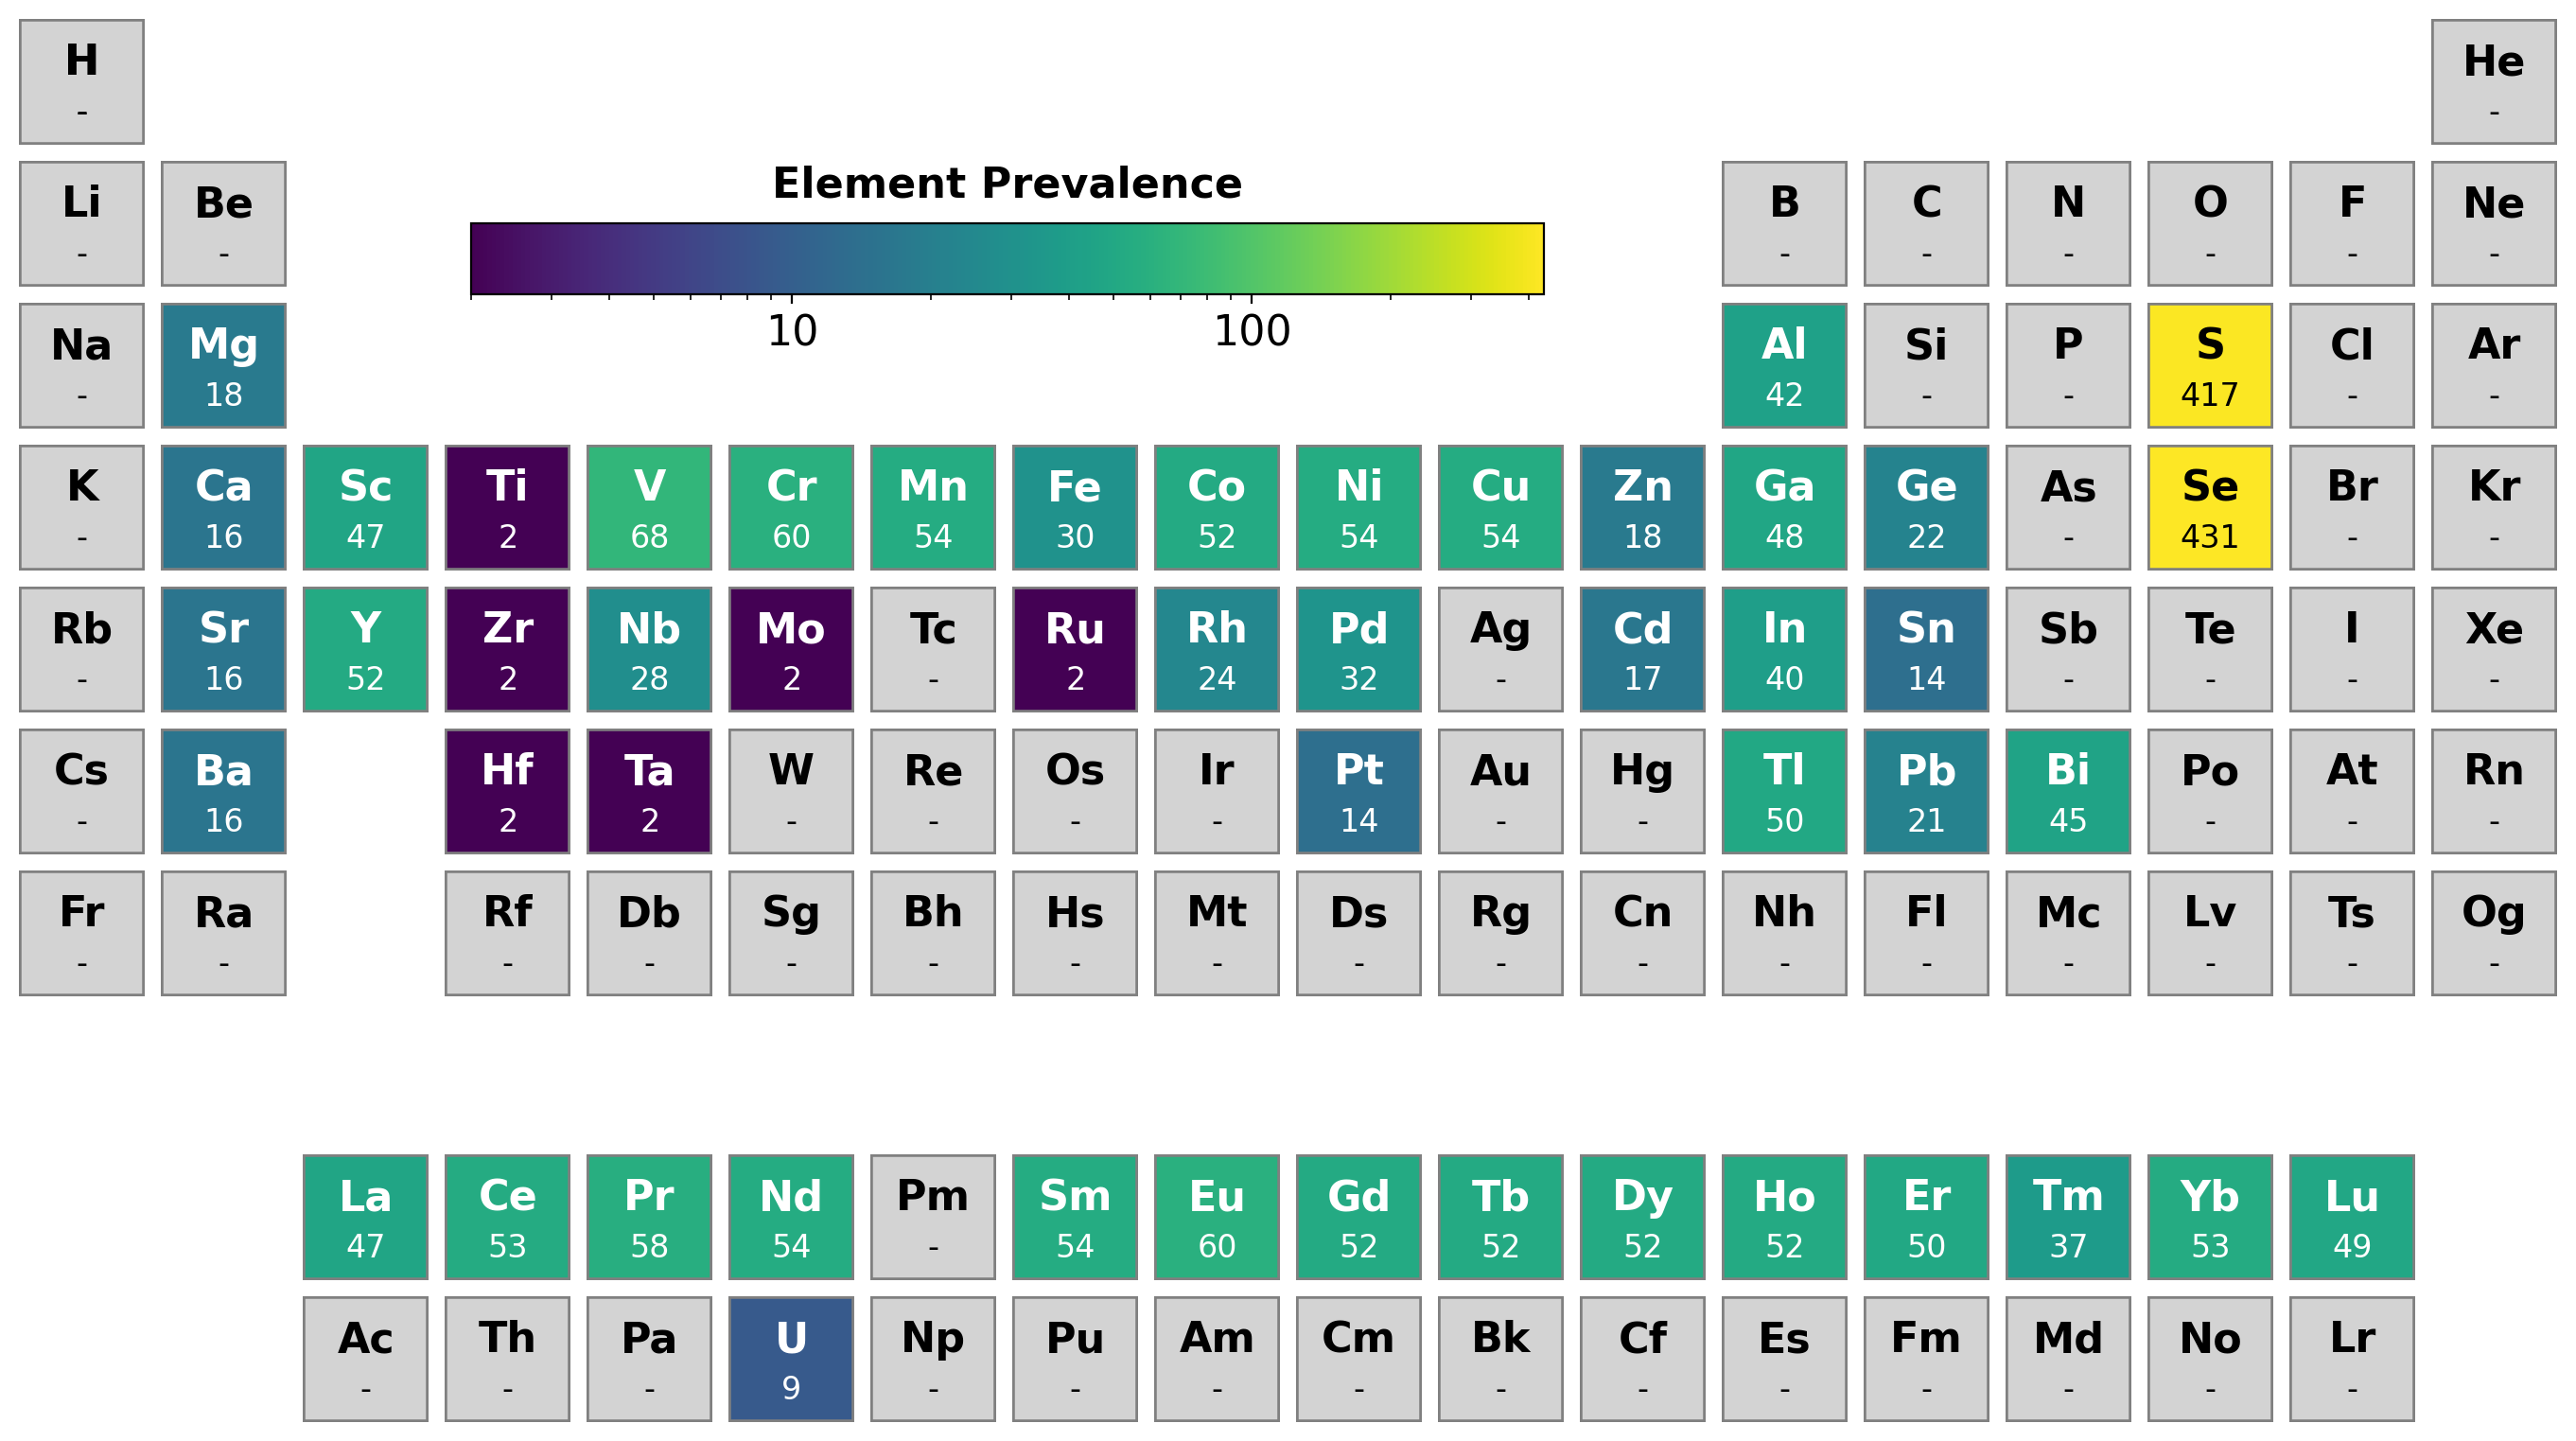

In [6]:
from tf_chpvk_pv.plots import graph_periodic_table

graph_periodic_table(stable_candidates_t_sisso)